In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime
import pickle

In [2]:
data = pd.read_csv("ipl.csv")

In [3]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [5]:
data.shape

(76014, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
mid               76014 non-null int64
date              76014 non-null object
venue             76014 non-null object
bat_team          76014 non-null object
bowl_team         76014 non-null object
batsman           76014 non-null object
bowler            76014 non-null object
runs              76014 non-null int64
wickets           76014 non-null int64
overs             76014 non-null float64
runs_last_5       76014 non-null int64
wickets_last_5    76014 non-null int64
striker           76014 non-null int64
non-striker       76014 non-null int64
total             76014 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [7]:
data['venue'].nunique()

35

In [8]:
data['batsman'].nunique()

411

In [9]:
data['bowler'].nunique()

329

In [10]:
data['bat_team'].nunique()

14

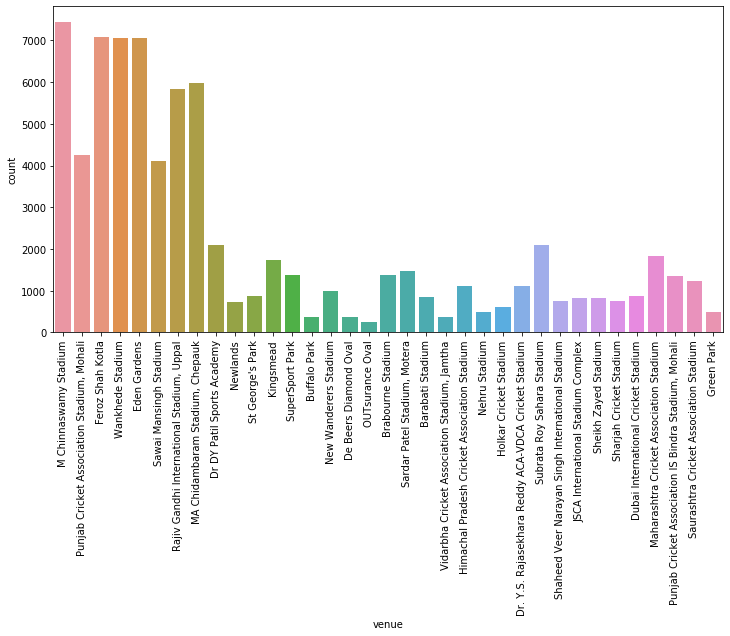

In [11]:
# Number of matches in each venue

plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=data)
plt.xticks(rotation='vertical')
plt.show()

### Data Cleaning

In [12]:
#removing unwanted columns
column_delete=['mid', 'venue','batsman','bowler','striker','non-striker']
data.drop(labels=column_delete,axis=1,inplace=True)

In [13]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [14]:
data.shape

(76014, 9)

In [15]:
current_team=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
        'Mumbai Indians', 'Kings XI Punjab',
        'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [16]:
data=data[(data['bat_team'].isin(current_team))&(data['bowl_team'].isin(current_team))]

In [17]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [18]:
data.shape

(53811, 9)

In [19]:
data['venue'].unique()

KeyError: 'venue'

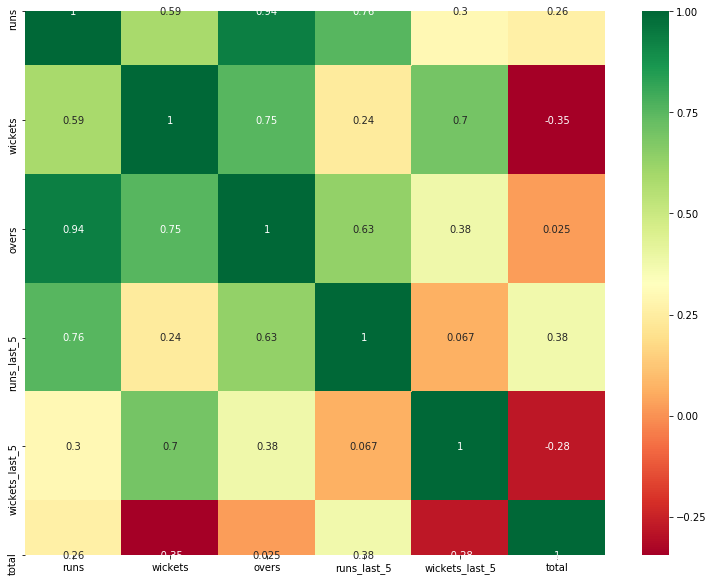

In [20]:

# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = data.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [21]:
#Removing First 6 over i.e Powerplay to that we have atleast 6 over data to predict
data=data[data['overs']>=6.0]

In [22]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222
42,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222


In [23]:
data.shape

(37389, 9)

In [24]:
#Convert Data string to datetime object
from datetime import datetime
data['date']=data['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222
42,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222


In [28]:
#Data Preprocessing : One Hot Encoding
encoded_data=pd.get_dummies(data=data,columns=['bat_team','bowl_team'])

In [29]:
encoded_data.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
38,2008-04-18,62,1,6.1,55,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39,2008-04-18,63,1,6.2,52,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
40,2008-04-18,64,1,6.3,47,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41,2008-04-18,66,1,6.4,45,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42,2008-04-18,67,1,6.5,46,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
encoded_data.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

### Train Test Split

In [33]:
#Splitting dataset into train and test set on the basis of date

x_train=encoded_data.drop(labels='total',axis=1)[encoded_data['date'].dt.year<=2016]
x_test=encoded_data.drop(labels='total',axis=1)[encoded_data['date'].dt.year>2016]

In [34]:
y_train=encoded_data[encoded_data['date'].dt.year<=2016]['total'].values
y_test=encoded_data[encoded_data['date'].dt.year>2016]['total'].values

In [35]:
#remove date column
x_train.drop(labels='date',axis=True,inplace=True)
x_test.drop(labels='date',axis=True,inplace=True)

In [38]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((34797, 21), (34797,), (2592, 21), (2592,))

## Model Implementation

### Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [40]:
pred = regressor.predict(x_test)

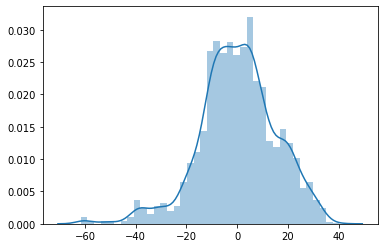

In [41]:
import seaborn as sns
sns.distplot(y_test-pred)

In [42]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 11.695460753505188
MSE: 230.28360399418818
RMSE: 15.175098154351035


### Ridge Regression

In [43]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [44]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.67327e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.81499e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.75991e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.7777e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.78321e-18): result may not be accurate.
  overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [45]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-302.81637286826657


In [46]:
prediction=ridge_regressor.predict(x_test)

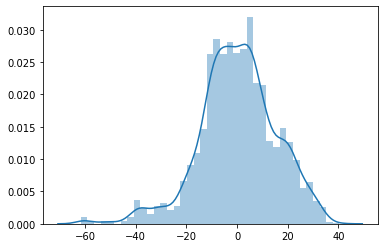

In [47]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [48]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 11.694089414835119
MSE: 230.3038218521341
RMSE: 15.175764292190825


### Lasso Regression

In [49]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [50]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3905246.088086619, tolerance: 2348.5394929841577
  positive)
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3824897.5840981305, tolerance: 2364.7205565326717
  positive)
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3983662.399920242, tolerance: 2476.552021912494
  positive)
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the 

{'alpha': 1}
-295.96589184649326


In [51]:
prediction = lasso_regressor.predict(x_test)

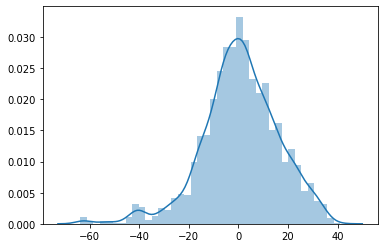

In [52]:
sns.distplot(y_test-prediction)

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 11.786988718226596
MSE: 240.40319798703854
RMSE: 15.504941082991529


### Decision Tree

In [55]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [56]:
# Predicting results
y_pred_dt = decision_regressor.predict(x_test)

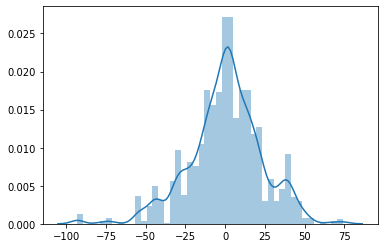

In [57]:
import seaborn as sns
sns.distplot(y_test-y_pred_dt)

In [59]:
# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

---- Decision Tree Regression - Model Evaluation ----
MAE: 17.207947530864196
MSE: 533.7835648148148
RMSE: 23.103756508732832


### Random Forest

In [60]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(x_train,y_train)

RandomForestRegressor()

In [61]:
# Predicting results
y_pred_rf = random_regressor.predict(x_test)

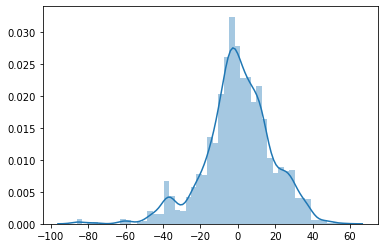

In [62]:
import seaborn as sns
sns.distplot(y_test-y_pred_rf)

In [69]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

---- Random Forest Regression - Model Evaluation ----
MAE: 13.645041703409758
MSE: 333.44077669104615
RMSE: 18.260360803966776


### XGBoost Regressor

In [70]:
# XGBoost Regression Model

from xgboost import XGBRegressor

xgb_regressor = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb_regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [71]:
# Predicting results
y_pred_xgb = xgb_regressor.predict(x_test)

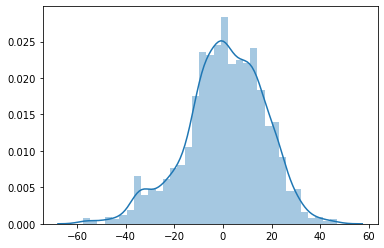

In [72]:
sns.distplot(y_test-y_pred_xgb)

In [73]:
# XGBoost Regression - Model Evaluation
print("---- XGBoost Regression - Model Evaluation ----")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_xgb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))

---- XGBoost Regression - Model Evaluation ----
MAE: 12.842206169057775
MSE: 266.95498232155677
RMSE: 16.338757061709337


### Gradient Boosting Regressor

In [74]:
# Gradient Boosting Regression Model

from sklearn.ensemble import GradientBoostingRegressor
GBR_regressor = GradientBoostingRegressor(n_estimators=100, max_depth=4)
GBR_regressor.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=4)

In [75]:
# Predicting results
y_pred_gbr = GBR_regressor.predict(x_test)

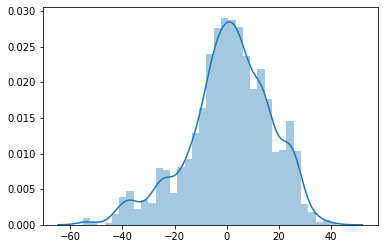

In [76]:
sns.distplot(y_test-y_pred_gbr)

In [77]:
# Gradient Boosting Regression - Model Evaluation
print("---- XGBoost Regression - Model Evaluation ----")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gbr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gbr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

---- XGBoost Regression - Model Evaluation ----
MAE: 12.431434412893934
MSE: 257.13084788445923
RMSE: 16.035300055953403


### LightGBM

In [78]:
import lightgbm

In [83]:
params = {
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
light = lightgbm.LGBMRegressor(num_leaves=31, max_depth=-1, learning_rate=0.05, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True, importance_type='split')
light.fit(x_train, y_train) 

LGBMRegressor(learning_rate=0.05)

In [84]:
light_prediction = light.predict(x_test)

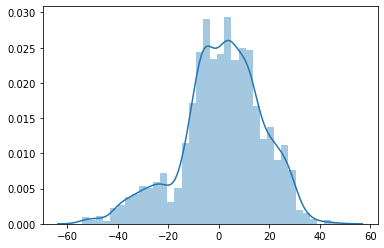

In [85]:
sns.distplot(y_test-light_prediction)

In [86]:
# Gradient Boosting Regression - Model Evaluation
print("---- XGBoost Regression - Model Evaluation ----")
print('MAE:', metrics.mean_absolute_error(y_test, light_prediction))
print('MSE:', metrics.mean_squared_error(y_test, light_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, light_prediction)))

---- XGBoost Regression - Model Evaluation ----
MAE: 12.72854019688429
MSE: 266.17203767230393
RMSE: 16.314779731038477


Note: Using Ensemble techniques did not reduce the error to a significant level. Hence, we will use simple linear regression model for prediction.

In [87]:
#Creating a pickle file for the Model
filename = 'Ipl-First-Inning-Prediction-Model.pkl'
pickle.dump(regressor, open(filename, 'wb'))